In [ ]:
from sklearn import preprocessing
from sklearn import model_selection

import evopipe
import steps
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
digits = datasets.load_digits()
train_X, test_X, train_Y, test_Y = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

In [ ]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("GridSearch score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for name, cls in steps.clfs.items():
        classif = cls()
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(model_selection.cross_val_score(classif, test_X, test_Y).mean())
        
        params = steps.params[name]
        gs = model_selection.GridSearchCV(classif, params, n_jobs=-1)
        gs.fit(train_X, train_Y)
        
        print(gs)
        print(gs.score(test_X, test_Y))
        print()

In [4]:
clf = evopipe.EvoPipeClassifier(steps.preproc, steps.clfs, steps.params)
clf.fit(train_X, train_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe in best_pipes:
    pipe.fit(train_X, train_Y)
    score = pipe.score(test_X, test_Y)
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))


Gen 1:

Hall of fame:
[('PCA', {'whiten': False}), ('PCA', {'whiten': False}), ('QDA', {'reg_param': 0.5, 'tol': 0.001})]
[('PCA', {'whiten': True}), ('kBest', {}), ('PCA', {'whiten': False}), ('kBest', {}), ('SVC', {'C': 15, 'gamma': 'auto', 'tol': 0.0001})]
[('PCA', {'whiten': False}), ('PCA', {'whiten': False}), ('SVC', {'C': 2, 'gamma': 0.0001, 'tol': 0.001})]
[('PCA', {'whiten': False}), ('kBest', {}), ('kBest', {}), ('PCA', {'whiten': False}), ('MLP', {'activation': 'logistic', 'solver': 'adam', 'alpha': 0.01, 'learning_rate': 'constant', 'tol': 0.0001, 'max_iter': 100, 'learning_rate_init': 0.01, 'power_t': 0.5, 'momentum': 0.1, 'hidden_layer_sizes': (100,)})]
[('PCA', {'whiten': True}), ('PCA', {'whiten': True}), ('PCA', {'whiten': False}), ('logR', {'penalty': 'l2', 'C': 0.1, 'tol': 0.0001, 'solver': 'sag'})]

Gen 6:

Hall of fame:
[('PCA', {'whiten': False}), ('PCA', {'whiten': False}), ('QDA', {'reg_param': 0.5, 'tol': 0.001})]
[('PCA', {'whiten': True}), ('kBest', {}), ('P

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Best pipeline test score: 0.9888888888888889

Score: 0.9888888888888889, Pipe: ['pca-1', 'pca-2', 'quadraticdiscriminantanalysis']
Score: 0.9888888888888889, Pipe: ['pca-1', 'pca-2', 'quadraticdiscriminantanalysis']
Score: 0.98, Pipe: ['pca-1', 'selectkbest', 'pca-2', 'pca-3', 'svc']
Score: 0.98, Pipe: ['pca-1', 'selectkbest-1', 'pca-2', 'selectkbest-2', 'svc']
Score: 0.9844444444444445, Pipe: ['pca', 'svc']


gen	avg     	min     	max     
0  	0.898095	0.639246	0.983662
1  	0.947593	0.824013	0.983662
2  	0.963506	0.896022	0.983662
3  	0.966942	0.719987	0.983662
4  	0.97808 	0.968838	0.983662
5  	0.982873	0.977728	0.983662
6  	0.982721	0.969546	0.983662
7  	0.983662	0.983662	0.983662
8  	0.983662	0.983662	0.983662
9  	0.983662	0.983662	0.983662
10 	0.983662	0.983662	0.983662
11 	0.983662	0.983662	0.983662
12 	0.983662	0.983662	0.983662
13 	0.983662	0.983662	0.983662
14 	0.983662	0.983662	0.983662
15 	0.983662	0.983662	0.983662
16 	0.983662	0.983662	0.983662
17 	0.983662	0.983662	0.983662
18 	0.983662	0.983662	0.983662
19 	0.983662	0.983662	0.983662
20 	0.983662	0.983662	0.983662
21 	0.983662	0.983662	0.983662
22 	0.983662	0.983662	0.983662
23 	0.983662	0.983662	0.983662
24 	0.983662	0.983662	0.983662
25 	0.983662	0.983662	0.983662
26 	0.983662	0.983662	0.983662
27 	0.983662	0.983662	0.983662
28 	0.983662	0.983662	0.983662
29 	0.983662	0.983662	0.983662
30 	0.983662	0.983662	0.983662
31 	0.98

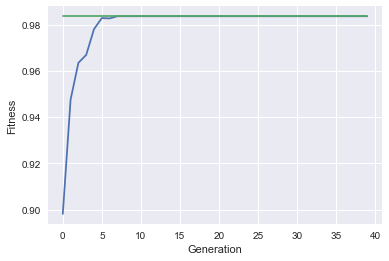

In [5]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, avgs, label='Average')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

ax1.plot(gen, maxs, label='Maximum')
ax1.set_xlabel("Generation")
# ax1.set_ylabel("Maximum Fitness")

plt.show()